In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import pydotplus
import os
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
from sklearn import preprocessing 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz 
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 2000)

C:\Users\Naeemah\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('alldata.csv')

C:\Users\Naeemah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset = data

In [4]:
dataset['FIELD_MAJOR_RECENT_DEGREE'].fillna('None', inplace=True)

In [5]:
dataset['AGE'] = pd.to_numeric(data['AGE'])

In [6]:
bins = [20, 30,  40,  50,  60,  70,  80]
dataset['AGE_BINS'] = pd.cut(dataset['AGE'], bins)

In [7]:
dataset['SALARY_NEW'] = dataset[' SALARY '].str.replace('$', '')

In [8]:
dataset['SALARY_NEW'] = dataset['SALARY_NEW'].str.replace(',', '')

In [9]:
dataset['SALARY'] = dataset['SALARY_NEW'].str.replace(' -   ', '')

In [10]:
dataset = dataset.drop('SALARY_NEW', axis=1)

In [11]:
dataset['SALARY'] = pd.to_numeric(dataset['SALARY'], errors='coerce')

In [12]:
bins = [0, 5000, 10000, 20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 200000]
dataset['SALARY_BINS'] = pd.cut(dataset['SALARY'], bins)

In [13]:
dataset = dataset.drop('SALARY', axis=1)

In [14]:
datasetbackup = dataset

In [15]:
modelme = dataset

In [16]:
modelme = modelme.drop('REFID', axis=1)
modelme = modelme.drop('AGE', axis=1)

In [17]:
modelme = modelme.drop('SALARY_BINS', axis=1)

In [18]:
modelme = modelme.drop('AGE_BINS', axis=1)

In [19]:
modelme = modelme.drop(' SALARY ', axis=1)

In [20]:
X = modelme.drop('SATISFACTION_JOB', axis=1)

In [21]:
y = modelme['SATISFACTION_JOB']

In [22]:
X = pd.get_dummies(X, prefix_sep='_', drop_first=False)

In [23]:
y = pd.get_dummies(y, prefix_sep='_', drop_first=False)

In [24]:
X.shape

(62373, 315)

In [25]:
y.shape

(62373, 4)

C:\Users\Naeemah\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00408628 0.00403682 0.0030917  0.00307658 0.00268468 0.00300602
 0.00391511 0.00253837 0.00260548 0.00171224 0.00170986 0.00066472
 0.00271562 0.00232705 0.00172886 0.00462208 0.00353017 0.00374594
 0.00204464 0.00229752 0.00441978 0.00424882 0.00250876 0.00245925
 0.00327324 0.00335358 0.00337852 0.00366972 0.00244435 0.00248324
 0.00382568 0.00154612 0.00333488 0.00096668 0.00054278 0.00062077
 0.00083722 0.00204254 0.00029281 0.0012374  0.00221036 0.0010899
 0.00107878 0.0026861  0.00157278 0.00073775 0.002056   0.00069186
 0.0006229  0.00025838 0.0001683  0.00031802 0.00026733 0.00023524
 0.00039455 0.00054548 0.00188186 0.00139846 0.00099548 0.00129674
 0.00205931 0.00221902 0.00308049 0.0012295  0.00293892 0.00110695
 0.00181928 0.00201058 0.00347631 0.00265143 0.00018058 0.0021294
 0.0034518  0.00322252 0.00169397 0.00286317 0.00375652 0.00255842
 0.00338853 0.0014377  0.00108181 0.00174913 0.00133149 0.00141508
 0.00150177 0.00069885 0.00244862 0.00144628 0.00135289 0.002444

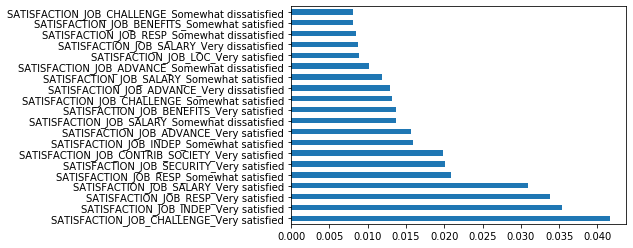

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [27]:
Xnew = X[['SATISFACTION_JOB_ADVANCE_Somewhat dissatisfied',
'SATISFACTION_JOB_ADVANCE_Very dissatisfied',
'SATISFACTION_JOB_ADVANCE_Very satisfied',
'SATISFACTION_JOB_BENEFITS_Very satisfied',
'SATISFACTION_JOB_CHALLENGE_Somewhat dissatisfied',
'SATISFACTION_JOB_CHALLENGE_Somewhat satisfied',
'SATISFACTION_JOB_CHALLENGE_Very dissatisfied',
'SATISFACTION_JOB_CHALLENGE_Very satisfied',
'SATISFACTION_JOB_INDEP_Somewhat satisfied',
'SATISFACTION_JOB_INDEP_Very satisfied',
'SATISFACTION_JOB_LOC_Very satisfied',
'SATISFACTION_JOB_RESP_Somewhat satisfied',
'SATISFACTION_JOB_RESP_Very satisfied',
'SATISFACTION_JOB_SALARY_Somewhat dissatisfied',
'SATISFACTION_JOB_SALARY_Somewhat satisfied',
'SATISFACTION_JOB_SALARY_Very dissatisfied',
'SATISFACTION_JOB_SALARY_Very satisfied',
'SATISFACTION_JOB_SECURITY_Very satisfied',
'SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat satisfied',
'SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size = 0.2)

In [29]:
dtree_score1 =[];dtree_score2 =[];dtree_score3 =[];dtree_score4 =[]

In [30]:
dtree = DecisionTreeClassifier(random_state = 1111, max_depth = 4);dtree.fit(X_train, y_train)
dtree_score1.append(dtree.score(X_test, y_test))

In [31]:
dtree = DecisionTreeClassifier(random_state = 1111, max_depth = 8);dtree.fit(X_train, y_train)
dtree_score2.append(dtree.score(X_test, y_test))

In [32]:
dtree = DecisionTreeClassifier(random_state = 1111, max_depth = 12);dtree.fit(X_train, y_train)
dtree_score3.append(dtree.score(X_test, y_test))

In [33]:
dtree = DecisionTreeClassifier(random_state = 1111, max_depth = 16);dtree.fit(X_train, y_train)
dtree_score4.append(dtree.score(X_test, y_test))

Text(0, 0.5, 'Test Accuracy')

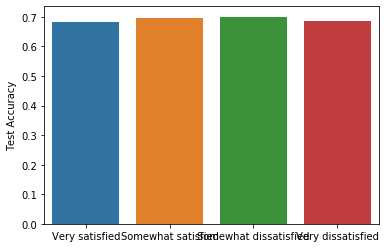

In [34]:
sns.barplot(data=[dtree_score1, dtree_score2, dtree_score3, dtree_score4])
plt.xticks([0,1,2,3], ['Very satisfied', 'Somewhat satisfied', 'Somewhat dissatisfied', 'Very dissatisfied'])
plt.ylabel('Test Accuracy')

Text(0, 0.5, 'Test Accuracy')

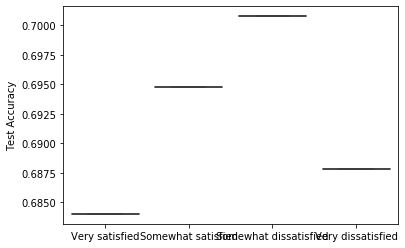

In [35]:
sns.boxplot(data=[dtree_score1, dtree_score2, dtree_score3, dtree_score4])
plt.xticks([0,1,2,3], ['Very satisfied', 'Somewhat satisfied', 'Somewhat dissatisfied', 'Very dissatisfied'])
plt.ylabel('Test Accuracy')

Text(0, 0.5, 'Test Accuracy')

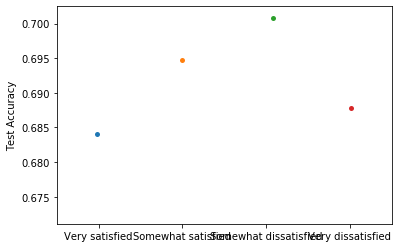

In [36]:
sns.stripplot(data=[dtree_score1, dtree_score2, dtree_score3, dtree_score4])
plt.xticks([0,1,2,3], ['Very satisfied', 'Somewhat satisfied', 'Somewhat dissatisfied', 'Very dissatisfied'])
plt.ylabel('Test Accuracy')

In [37]:
Xnew_col = Xnew.columns

In [38]:
print(); print(Xnew[Xnew_col].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62373 entries, 0 to 62372
Data columns (total 20 columns):
SATISFACTION_JOB_ADVANCE_Somewhat dissatisfied         62373 non-null uint8
SATISFACTION_JOB_ADVANCE_Very dissatisfied             62373 non-null uint8
SATISFACTION_JOB_ADVANCE_Very satisfied                62373 non-null uint8
SATISFACTION_JOB_BENEFITS_Very satisfied               62373 non-null uint8
SATISFACTION_JOB_CHALLENGE_Somewhat dissatisfied       62373 non-null uint8
SATISFACTION_JOB_CHALLENGE_Somewhat satisfied          62373 non-null uint8
SATISFACTION_JOB_CHALLENGE_Very dissatisfied           62373 non-null uint8
SATISFACTION_JOB_CHALLENGE_Very satisfied              62373 non-null uint8
SATISFACTION_JOB_INDEP_Somewhat satisfied              62373 non-null uint8
SATISFACTION_JOB_INDEP_Very satisfied                  62373 non-null uint8
SATISFACTION_JOB_LOC_Very satisfied                    62373 non-null uint8
SATISFACTION_JOB_RESP_Somewhat satisfied              

In [39]:
Xnew[Xnew_col].describe()

,SATISFACTION_JOB_ADVANCE_Somewhat dissatisfied,SATISFACTION_JOB_ADVANCE_Very dissatisfied,SATISFACTION_JOB_ADVANCE_Very satisfied,SATISFACTION_JOB_BENEFITS_Very satisfied,SATISFACTION_JOB_CHALLENGE_Somewhat dissatisfied,SATISFACTION_JOB_CHALLENGE_Somewhat satisfied,SATISFACTION_JOB_CHALLENGE_Very dissatisfied,SATISFACTION_JOB_CHALLENGE_Very satisfied,SATISFACTION_JOB_INDEP_Somewhat satisfied,SATISFACTION_JOB_INDEP_Very satisfied,SATISFACTION_JOB_LOC_Very satisfied,SATISFACTION_JOB_RESP_Somewhat satisfied,SATISFACTION_JOB_RESP_Very satisfied,SATISFACTION_JOB_SALARY_Somewhat dissatisfied,SATISFACTION_JOB_SALARY_Somewhat satisfied,SATISFACTION_JOB_SALARY_Very dissatisfied,SATISFACTION_JOB_SALARY_Very satisfied,SATISFACTION_JOB_SECURITY_Very satisfied,SATISFACTION_JOB_CONTRIB_SOCIETY_Somewhat satisfied,SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied
count,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000,62373.000000
mean,0.220753,0.103426,0.242733,0.369423,0.117487,0.391483,0.051208,0.439822,0.327866,0.580331,0.556795,0.415148,0.466195,0.154169,0.494188,0.074888,0.276754,0.440367,0.376942,0.486012
std,0.414757,0.304517,0.428739,0.482652,0.322002,0.488086,0.220424,0.496369,0.469440,0.493509,0.496768,0.492751,0.498860,0.361114,0.499970,0.263213,0.447398,0.496435,0.484624,0.499808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
Xnew.shape

(62373, 20)

In [41]:
y.shape

(62373, 4)

In [42]:
y_predict = dtree.predict(X_test)

In [43]:
y_predict

array([[0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [44]:
y_trainpredict = dtree.predict(X_train)

In [45]:
y_trainpredict

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0]], dtype=uint8)

In [46]:
dtree.predict_proba(X_test)

[array([[0.9       , 0.1       ],
        [0.52777778, 0.47222222],
        [1.        , 0.        ],
        ...,
        [0.66666667, 0.33333333],
        [1.        , 0.        ],
        [1.        , 0.        ]]), array([[0.1       , 0.9       ],
        [0.94444444, 0.05555556],
        [0.7972973 , 0.2027027 ],
        ...,
        [0.33333333, 0.66666667],
        [0.22222222, 0.77777778],
        [0.33333333, 0.66666667]]), array([[1.        , 0.        ],
        [0.56944444, 0.43055556],
        [1.        , 0.        ],
        ...,
        [1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ]]), array([[1.        , 0.        ],
        [0.95833333, 0.04166667],
        [0.2027027 , 0.7972973 ],
        ...,
        [1.        , 0.        ],
        [0.77777778, 0.22222222],
        [0.66666667, 0.33333333]])]

In [47]:
dtree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1111,
 'splitter': 'best'}

In [48]:
X1_train, X1_test, y1_train, y1_test = train_test_split(Xnew, y, test_size = 0.2, random_state=1111)

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [50]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [51]:
classifier = RandomForestClassifier(random_state = 1111, )
classifier.fit(X1_train, y1_train)

C:\Users\Naeemah\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [52]:
classifier.score(X1_test, y1_test)

0.7064529058116232

In [53]:
y1_pred = classifier.predict(X1_test)

In [54]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.7064529058116232


In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [56]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X1_train, y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
rf_random.best_params_